Steps of implementing neural network from numpy
1. Arrange your dataset and parameters W1,W1
2. Implement cost function
3. Implement forward propagation
4. implemet back propagation
5. plot cost vs time and check whether it is monotonosly decreasing or not.
6. improve algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

![Neural-Network](assets/nn-numpy/2-layer-nn.png)

Let us assume we have 1000 column and 64 rows. And also we can say, each training example has 1000 features, which will act as input layer to neural network. 
1. Batch size = 64 i.e 64 example
2. Input layer = 1000, i.e each training example has 1000 feature
3. hidden layer = 100, 
4. output layer = 10, i.e 


In [25]:
batch_size = 1024  # batch size
input_dim = 1000  # input dimension
hidden_dim = 100  # hidden dimension
output_dim = 10   # output dimension

In [26]:
X = np.random.randn(batch_size, input_dim)
Y = np.random.randint(10, size=(batch_size, output_dim))
print('training sample:')
print('X.shape:',X.shape)
print('Y shape:',Y.shape)

training sample:
X.shape: (1024, 1000)
Y shape: (1024, 10)


In [27]:
# Randomly Initialize Weights
W1 = np.random.randn(input_dim, hidden_dim)
W2 = np.random.randn(hidden_dim, output_dim)
print('W1.shape:',W1.shape)
print('W2 shape:',W2.shape)

W1.shape: (1000, 100)
W2 shape: (100, 10)


### 2. let us implement cost function 

In [28]:
def cost(X,W1,cost='cost'):
    h = X.dot(W1)
    if (cost == 'linear'):
        return h
    if cost == 'relu':
        return np.maximum(h, 0)    

Implementing Forward propagation

In [29]:
def loss(y_pred,y):
    # Compute loss
    loss = np.square(y_pred-y).sum()
    return loss 
    

In [30]:
def forward(X,Y,cost):
    # Forward pass: compute predicted y
    h = cost(X,W1,'linear') 
    h_relu = cost(X,W1,'relu')
    y_pred = h_relu.dot(W2)
    return h,h_relu,y_pred

In [31]:
def backward(x,y_pred,y, h, h_relu,W1,W2):
    grad_y_pred = 2.0 * (y_pred-y)
    grad_W2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(W2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_W1 = x.T.dot(grad_h)
    return grad_W2, grad_W1

In [32]:
tt = []
losses = []
def nn(X,Y,W1,W2):
    lr = 1e-8
    for iterr in range(1500):
        h,h_relu,y_pred = forward(X,Y,cost)
        
        # computing loss
        los = loss(y_pred,Y)
        tt.append(iterr)
        losses.append(los)
        
        # back propagation 
        grad_W2,grad_W1 = backward(X,y_pred,Y, h, h_relu,W1,W2)
        # update Weights
        W1 -= lr * grad_W1
        W2 -= lr * grad_W2

In [33]:
nn(X,Y,W1,W2)

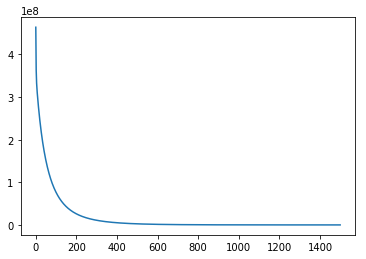

In [34]:
plt.plot(tt, losses)